## Machine Learning Engineer Nanodegree
## Capstone Project

### Exploratory Data Analysis 

We will perform Exploratory Analysis and Preprocessing of the data.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

import visuals as vs

# sns.set(style="whitegrid")
sns.set(style="darkgrid")
sns.set_context("paper")
# Pretty display for notebooks
%matplotlib inline

In [2]:
# Load the dataset
try:
    data_train_raw = pd.read_csv("dataset/train.csv")
    print("Training Dataset has {} samples with {} features each.".format(*data_train_raw.shape))
except:
    print("Dataset could not be loaded.")

Training Dataset has 37670293 samples with 24 features each.


In [3]:
# Load the dataset
try:
    data_test = pd.read_csv("dataset/test.csv")
    print("Test Dataset has {} samples with {} features each.".format(*data_test.shape))
except:
    print("Dataset could not be loaded.")

Test Dataset has 2528243 samples with 22 features each.


Description of the features as given on Kaggle.

|  Feature |  Description | 
|----------|:---------|
| date_time  | Timestamp     |
| site_name | ID of the Expedia point of sale (i.e. Expedia.com, Expedia.co.uk, Expedia.co.jp, ...)|
| posa_continent | ID of continent associated with site_name |
| user_location_country |The ID of the country the customer is located |
| user_location_region|The ID of the region the customer is located|
| user_location_city| The ID of the city the customer is located|
| orig_destination_distance| Physical distance between a hotel and a customer at the time of search. A null means the distance could not be calculated|
| user_id| ID of user|
| is_mobile| 1 when a user connected from a mobile device, 0 otherwise|
| is_package| 1 if the click/booking was generated as a part of a package (i.e. combined with a flight), 0 otherwise|
| channel| ID of a marketing channel|
| srch_ci| Checkin date|
| srch_co| Checkout date|
| srch_adults_cnt| The number of adults specified in the hotel room|
| srch_children_cnt| The number of (extra occupancy) children specified in the hotel room|
| srch_rm_cnt| The number of hotel rooms specified in the search|
| srch_destination_id| ID of the destination where the hotel search was performed|
| srch_destination_type_id| Type of destination|
| hotel_continent| Hotel continent|
| hotel_country| Hotel country|
| hotel_market| Hotel market|
| is_booking | 1 if a booking, 0 if a click|
| cnt| Numer of similar events in the context of the same user session|
| hotel_cluster| ID of hotel cluster|

In [4]:
data_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37670293 entries, 0 to 37670292
Data columns (total 24 columns):
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
is_booking                   int64
cnt                          int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
hotel_cluster                int64
dtypes: float64(1), int64(20), object(3)

In [5]:
data_train_raw.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528243 entries, 0 to 2528242
Data columns (total 22 columns):
id                           int64
date_time                    object
site_name                    int64
posa_continent               int64
user_location_country        int64
user_location_region         int64
user_location_city           int64
orig_destination_distance    float64
user_id                      int64
is_mobile                    int64
is_package                   int64
channel                      int64
srch_ci                      object
srch_co                      object
srch_adults_cnt              int64
srch_children_cnt            int64
srch_rm_cnt                  int64
srch_destination_id          int64
srch_destination_type_id     int64
hotel_continent              int64
hotel_country                int64
hotel_market                 int64
dtypes: float64(1), int64(18), object(3)
memory usage: 424.4+ MB


In [7]:
data_test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [8]:
data_train = data_train_raw.copy()

The value of 1 for `is_booking` represents that an actual booking happened and 0 represents it was only a click with no booking. Entries with no booking doesn't help us making predictions and can be removed. This also reduces the number of samples from ~37 million to ~3 million, thus making our algorithms faster. 

In [9]:
data_train['is_booking'].value_counts()

0    34669600
1     3000693
Name: is_booking, dtype: int64

In [10]:
data_train = data_train[data_train['is_booking'] == 1]

Next, we will try to see if there are null values for any of the features in any sample.

In [11]:
data_train.isnull().sum()

date_time                          0
site_name                          0
posa_continent                     0
user_location_country              0
user_location_region               0
user_location_city                 0
orig_destination_distance    1015179
user_id                            0
is_mobile                          0
is_package                         0
channel                            0
srch_ci                            0
srch_co                            0
srch_adults_cnt                    0
srch_children_cnt                  0
srch_rm_cnt                        0
srch_destination_id                0
srch_destination_type_id           0
is_booking                         0
cnt                                0
hotel_continent                    0
hotel_country                      0
hotel_market                       0
hotel_cluster                      0
dtype: int64

`orig_destination_distance` has 1,015,179 null values. We'll deal with this later. 

Let's visualize the counts of each `hotel_cluster`.

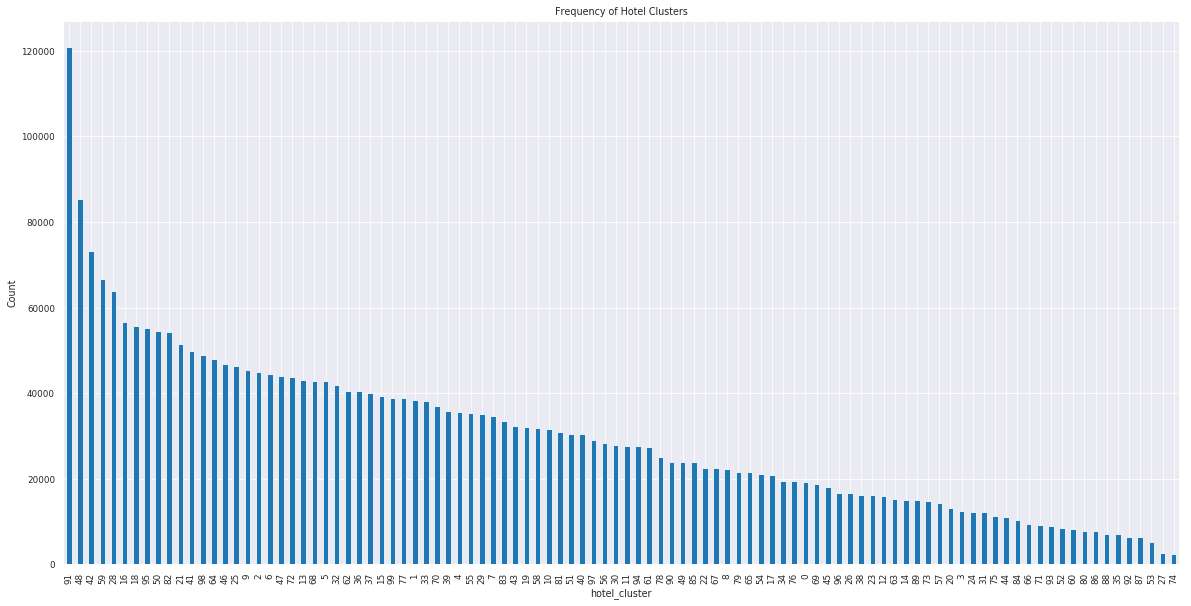

In [12]:
data_train['hotel_cluster'].value_counts().plot(kind='bar', figsize=(20,10), colormap='tab10')

plt.xlabel("hotel_cluster")
plt.ylabel("Count")
plt.title("Frequency of Hotel Clusters")
plt.show()

In [13]:
top5_hotel_clusters = data_train['hotel_cluster'].value_counts().head(5)
top5_hotel_clusters

91    120972
48     85377
42     73123
59     66609
28     63978
Name: hotel_cluster, dtype: int64

**Feature Engineering** is performed on some of the features to make them numeric. 

In [14]:
srch_ci = pd.to_datetime(data_train["srch_ci"], format='%Y-%m-%d', errors="coerce")
srch_co = pd.to_datetime(data_train["srch_co"], format='%Y-%m-%d', errors="coerce")

data_train["date_time"] = pd.to_datetime(data_train["date_time"], format='%Y-%m-%d', errors="coerce")
data_train["stay_duration"] = (srch_co-srch_ci).astype('timedelta64[D]')
data_train["srch_month"] = data_train["date_time"].apply(lambda dt: dt.month)
data_train["srch_ci_month"] = srch_ci.apply(lambda dt: dt.month)
data_train["srch_co_month"] = srch_co.apply(lambda dt: dt.month)

In [15]:
data_train = data_train.drop(["date_time", "srch_ci", "srch_co", "is_booking"], axis=1)

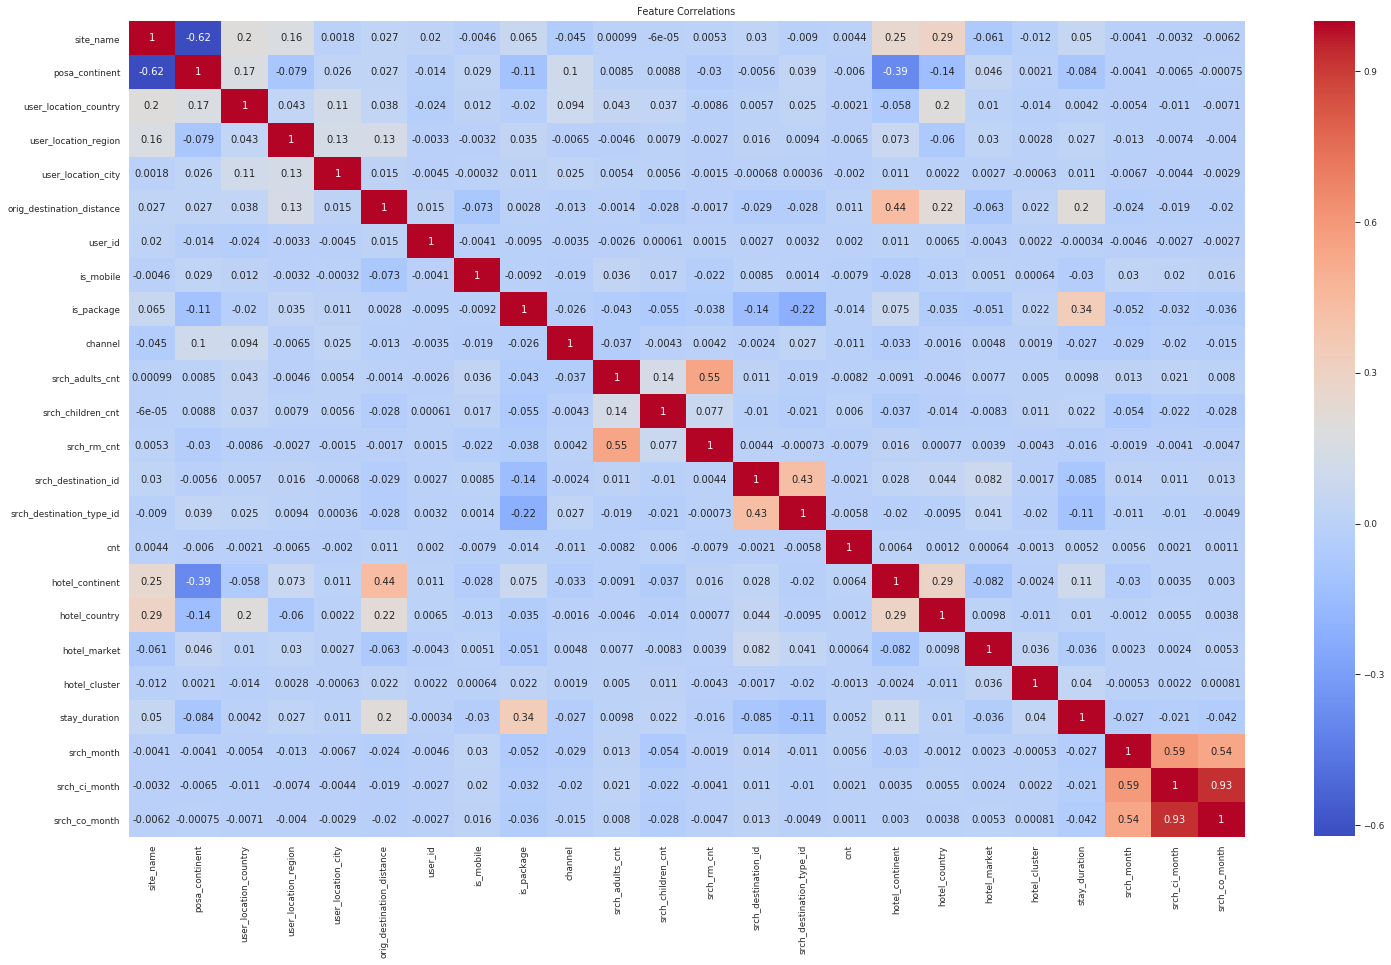

In [16]:
corr = data_train.corr()
plt.subplots(figsize=(25,15))
plt.title("Feature Correlations")
sns.heatmap(corr, annot=True, cmap="coolwarm")

Some of the correlations seen are between:
* srh_adults_cnt & srh_rm_cnt
* srh_destination_id & srh_destination_type_id
* srh_destination_distance & hotel_continent
* is_package & stay duration
* srh_room_cnt & srh_adults_cnt

There is no distinct correlation between hotel_cluster and any of the features

Let us now look at the `destinations` dataset. 

In [17]:
# Load the destinations dataset
try:
    data_destinations = pd.read_csv("dataset/destinations.csv")
    print("Test Destinations Dataset has {} samples with {} features each.".format(*data_destinations.shape))
except:
    print("Dataset could not be loaded.")

Test Destinations Dataset has 62106 samples with 150 features each.


In [18]:
data_destinations.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


### Dimentionality Reduction

There are 150 features in this dataset. We will reduce the number of features using PCA. 

In [19]:
srch_destination_id = data_destinations["srch_destination_id"]
latent_features_data = data_destinations.drop(["srch_destination_id"], axis=1)

In [20]:
latent_features_data.describe().loc[['min','max']]

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
min,-2.597617,-2.671613,-2.671613,-2.671613,-2.671613,-2.344165,-2.671613,-2.671613,-2.495544,-2.496930,...,-2.620769,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613,-2.671613
max,-1.596004,-1.341325,-1.917826,-1.814585,-1.607558,-1.209058,-1.474441,-1.879678,-0.977219,-1.791073,...,-1.855317,-0.960356,-1.357408,-1.775218,-1.790435,-1.799341,-1.335962,-1.816892,-1.718778,-1.500309


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 

dest_features = ["d{0}".format(i + 1) for i in range(149)]
latent_features_data_normalized = latent_features_data.copy()
latent_features_data_normalized[dest_features] = scaler.fit_transform(latent_features_data_normalized[dest_features])
latent_features_data_normalized.describe().loc[['min','max']]

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Principal Component Analysis

In [22]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(latent_features_data_normalized)

pca_results = vs.pca_results(latent_features_data_normalized, pca)
display(pca_results["Explained Variance"].cumsum().to_frame("Cumulative Explained Variance"))

,Cumulative Explained Variance
Dimension 1,0.5414
Dimension 2,0.6149
Dimension 3,0.6555
Dimension 4,0.6778
Dimension 5,0.6979
Dimension 6,0.7152
Dimension 7,0.7295
Dimension 8,0.7428
Dimension 9,0.7533
Dimension 10,0.7627


~70% variance in the data is explained by the first 5 principal components.

Visualizing this provides a clearer view. Visualization code is based on [this](https://www.kaggle.com/fabiendaniel/customer-segmentation) Kaggle notebook. 

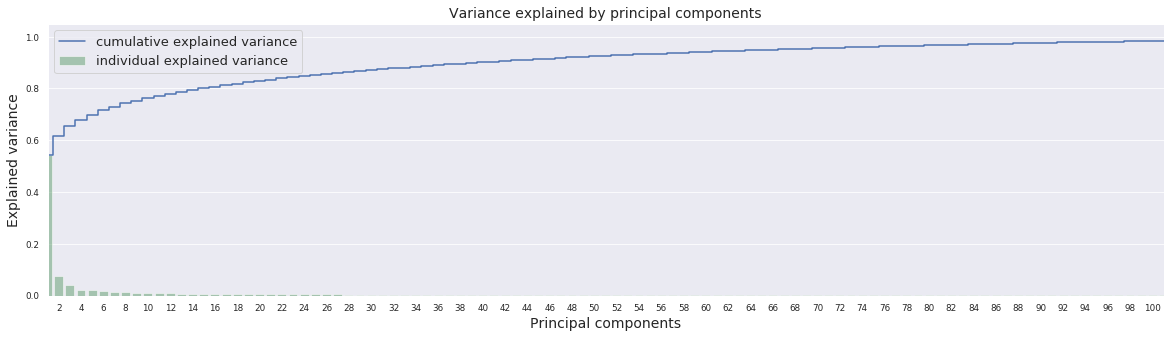

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.set(font_scale=1)
plt.step(range(latent_features_data_normalized.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,latent_features_data_normalized.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.title('Variance explained by principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [24]:
pca = PCA(n_components=5, random_state=1)
destinations_reduced_data = pca.fit_transform(latent_features_data_normalized)

destinations_reduced_data = pd.DataFrame(destinations_reduced_data, columns = ["d{0}".format(i + 1) for i in range(5)])
destinations_reduced_data = pd.concat([data_destinations["srch_destination_id"], destinations_reduced_data], axis=1)
destinations_reduced_data.head()

,srch_destination_id,d1,d2,d3,d4,d5
0,0,-0.035081,0.114494,-0.050162,-0.097483,0.065729
1,1,-0.429997,0.039974,0.068071,0.025081,-0.031307
2,2,0.054116,0.015300,0.073246,0.168669,0.132129
3,3,-0.473205,-0.024389,0.019545,0.000167,-0.025236
4,4,-0.208739,-0.037167,0.014076,-0.029207,0.005117


In [25]:
data_train_final = pd.merge(data_train, destinations_reduced_data, how='left', on="srch_destination_id")

In [26]:
# Fill NaNs in orig_destination_distance with the mean of the values
data_train_final['orig_destination_distance'] = data_train_final['orig_destination_distance'].fillna((data_train_final['orig_destination_distance'].mean()))


In [27]:
data_train_final.isna().sum()
data_train_final.fillna(0, inplace=True)

#### Feature Importances

In [28]:
from sklearn.model_selection import train_test_split

y=data_train_final["hotel_cluster"]
X=data_train_final.drop(["hotel_cluster"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # 80% training and 20% test


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.0min remaining:   40.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.5min finished


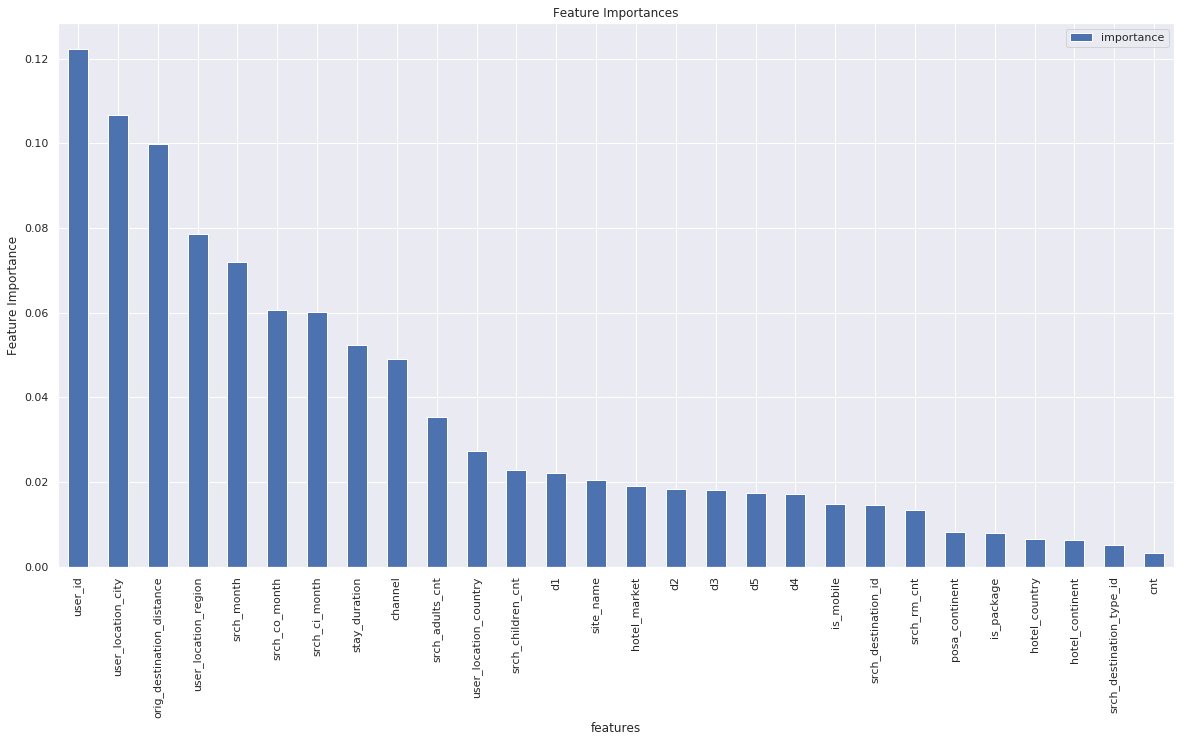

In [30]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'importance': importances })
feature_imp.sort_values(by='importance', ascending=False).plot(kind='bar', x='features', figsize=(20,10))
plt.ylabel('Feature Importance')
plt.title("Feature Importances")
plt.show()

In [31]:
data_train_final = data_train_final.drop(["cnt"], axis=1)

### Evaluating Model Performance
#### Naive Predictor 

In [32]:
from average_precision import mapk

In [33]:
target = data_train_final["hotel_cluster"].tolist()
target = np.array(target).reshape(-1, 1)

In [34]:
predictions = [list(top5_hotel_clusters.index) for i in range(100)]

In [35]:
map5_naive = mapk(target, predictions, k=5)
map5_naive

0.033666666666666664

In [36]:
import gc
del data_train_raw
del data_destinations
del data_test
gc.collect()

4971

#### Supervised Learning Models

Due to the large size of the dataset, pick 15,000 user IDs at random create a reduced dataset with those user IDs only. 

In [37]:
import random

unique_users = data_train_final['user_id'].unique()
sampled_user_ids = random.sample(list(unique_users), 15000)
data_train_reduced = data_train_final[data_train_final['user_id'].isin(sampled_user_ids)]

print("Reduced dataset contains {} samples and {} features".format(data_train_reduced.shape[0], data_train_reduced.shape[1]))

Reduced dataset contains 54670 samples and 28 features


In [38]:
def mapk_scorer(actual, predicted, k):
    predictions = []
    for p in predicted:
        predictions.append(p.argsort()[::-1][:5]) # Pick the 5 most probable 

    target = actual.tolist()
    target = np.array(target).reshape(-1, 1)        
    return mapk(target, predictions, k)

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def map5_scores(clf, data):
    predictors = [c for c in data.columns if c not in ["hotel_cluster"]]
    scores = cross_val_score(clf, data[predictors], data['hotel_cluster'], cv=3, scoring = make_scorer(mapk_scorer, needs_proba=True, k=5), verbose=1)
    return scores

In [40]:
def evaluate_classifiers(classifiers, dataset):
    results = []

    for clf in classifiers:
        clf_name = clf.__class__.__name__

        start = time()    
        scores = map5_scores(clf, dataset)
        end = time()
        print("Classifier: {}; MAP@5 scores: {}".format(clf_name, scores))
        results.append({"Classifer": clf_name, "Mean MAP@5": scores.mean(), "Time taken (s)": "{:.2f}".format(end-start)})

    return results

We will initially use the default parameters for all the models.

In [41]:
from time import time

from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

clf_NB = BernoulliNB()
clf_DecisionTree = DecisionTreeClassifier(random_state=42)
clf_RandomForest = RandomForestClassifier(n_jobs=-1, random_state=42)
clf_ExtraTrees = ExtraTreesClassifier(n_jobs=-1, random_state=42)
clf_XGB = XGBClassifier(n_jobs=-1, random_state=42)

results = evaluate_classifiers([clf_NB, clf_DecisionTree, clf_RandomForest, clf_ExtraTrees, clf_XGB], data_train_reduced)

pd.DataFrame(results)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s finished


Classifier: BernoulliNB; MAP@5 scores: [0.13138947 0.12998446 0.12848437]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.8s finished


Classifier: DecisionTreeClassifier; MAP@5 scores: [0.09235967 0.09334065 0.08932604]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.0s finished


Classifier: RandomForestClassifier; MAP@5 scores: [0.16603941 0.16292284 0.16287071]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.1s finished


Classifier: ExtraTreesClassifier; MAP@5 scores: [0.16172528 0.16323459 0.16144562]
Classifier: XGBClassifier; MAP@5 scores: [0.21636993 0.22100475 0.21743557]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 15.2min finished


,Classifer,Mean MAP@5,Time taken (s)
0,BernoulliNB,0.129953,3.43
1,DecisionTreeClassifier,0.091675,5.85
2,RandomForestClassifier,0.163944,6.04
3,ExtraTreesClassifier,0.162135,5.07
4,XGBClassifier,0.218270,914.93


### Model Tuning

Use Grid Search Cross Validation to find the optimum hyperparameters.

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

def tune_params(clf, parameters, X, y, random_search=False):
    scorer = make_scorer(mapk_scorer, needs_proba=True, k=5)
    
    if random_search:
        print("Randomized Grid Search CV")        
        search = RandomizedSearchCV(clf, param_distributions=parameters, scoring=scorer, cv=3)
    else:
        print("Performing Grid Search CV")
        search = GridSearchCV(clf, parameters, scoring = scorer, cv=3, verbose=1, n_jobs=-1)

    start = time()
    search.fit(X, y)
    end = time()
    
    return search, (end-start)

In [43]:

y=data_train_reduced["hotel_cluster"]
X=data_train_reduced.drop(["hotel_cluster"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

param_grid = {
    'min_samples_leaf': list(range(1, 7, 2)),
    'min_samples_split' : list(range(2, 6)),
}

clf_DecisionTree = DecisionTreeClassifier(random_state=42)
search, time_taken = tune_params(clf_DecisionTree, param_grid, X_train, y_train)
print("Classifier: {}".format(clf_DecisionTree.__class__.__name__))
print("Best params: {}".format(search.best_params_))
print("Best score: {}".format(search.best_score_))
print("Time taken: {:.2f} s".format(time_taken))

print()
clf_RandomForest = RandomForestClassifier(n_estimators=51, random_state=42)
search, time_taken = tune_params(clf_RandomForest, param_grid, X_train, y_train)
print("Classifier: {}".format(clf_RandomForest.__class__.__name__))
print("Best params: {}".format(search.best_params_))
print("Best score: {}".format(search.best_score_))
print("Time taken: {:.2f} s".format(time_taken))

print()
clf_ExtraTrees = ExtraTreesClassifier(n_estimators=57, random_state=42)
search, time_taken = tune_params(clf_ExtraTrees, param_grid, X_train, y_train)
print("Classifier: {}".format(clf_ExtraTrees.__class__.__name__))
print("Best params: {}".format(search.best_params_))
print("Best score: {}".format(search.best_score_))
print("Time taken: {:.2f} s".format(time_taken))


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


Performing Grid Search CV
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.1s finished


Classifier: DecisionTreeClassifier
Best params: {'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.11734345466739833
Time taken: 3.77 s

Performing Grid Search CV
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   10.5s finished


Classifier: RandomForestClassifier
Best params: {'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.18638192793122368
Time taken: 11.92 s

Performing Grid Search CV
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    9.3s finished


Classifier: ExtraTreesClassifier
Best params: {'min_samples_leaf': 5, 'min_samples_split': 2}
Best score: 0.18690323760746297
Time taken: 10.21 s


In [44]:
clf_XGB = XGBClassifier(n_jobs=-1, random_state=42)
parameters = {'max_depth': [3, 6, 9], 'colsample_bytree': [0.3, 0.4, 0.5] }
search, time_taken = tune_params(clf_XGB, parameters, X_train, y_train)
print("Classifier: {}".format(clf_XGB.__class__.__name__))
print("Best params: {}".format(search.best_params_))
print("Best score: {}".format(search.best_score_))
print("Time taken: {:.2f} s".format(time_taken))

Performing Grid Search CV
Fitting 3 folds for each of 9 candidates, totalling 27 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  3.9min finished


Classifier: XGBClassifier
Best params: {'colsample_bytree': 0.4, 'max_depth': 3}
Best score: 0.17769343332723614
Time taken: 255.22 s


In [45]:
clf_NB = BernoulliNB()
clf_DecisionTree = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=2, random_state=42)
clf_RandomForest = RandomForestClassifier(min_samples_leaf=5, min_samples_split=2, n_estimators=51, n_jobs=-1, random_state=42)
clf_ExtraTrees = ExtraTreesClassifier(min_samples_leaf=5, min_samples_split=2, n_estimators=57, n_jobs=-1, random_state=42)
clf_XGB = XGBClassifier(n_jobs=-1, colsample_bytree=0.3, max_depth=9, random_state=42)

results = evaluate_classifiers([clf_NB, clf_DecisionTree, clf_RandomForest, clf_ExtraTrees, clf_XGB], data_train_reduced)

pd.DataFrame(results)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.2s finished


Classifier: BernoulliNB; MAP@5 scores: [0.13138947 0.12998446 0.12848437]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.8s finished


Classifier: DecisionTreeClassifier; MAP@5 scores: [0.13701837 0.14079813 0.14053851]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s finished


Classifier: RandomForestClassifier; MAP@5 scores: [0.22417735 0.22670872 0.22520162]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.0s finished


Classifier: ExtraTreesClassifier; MAP@5 scores: [0.22562452 0.22647285 0.22513564]
Classifier: XGBClassifier; MAP@5 scores: [0.22732826 0.22468276 0.22538308]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 20.6min finished


,Classifer,Mean MAP@5,Time taken (s)
0,BernoulliNB,0.129953,3.24
1,DecisionTreeClassifier,0.139452,4.77
2,RandomForestClassifier,0.225363,7.94
3,ExtraTreesClassifier,0.225744,7.02
4,XGBClassifier,0.225798,1235.90


RandomForestClassifier and ExtraTreesClassifier have better scores and relatively lower times. Hence, tune these further. 

In [46]:
param_grid = {
    'n_estimators': [51, 91, 131],
    'min_samples_leaf': list(range(1, 7, 2)) + [50],
    'min_samples_split' : list(range(2, 6)),
    'max_depth': list(range(1, 32, 4))
}

print()
clf_RandomForest = RandomForestClassifier(max_depth=None, n_estimators=51, random_state=42)
search, time_taken = tune_params(clf_RandomForest, param_grid, X_train, y_train)
print("Classifier: {}".format(clf_RandomForest.__class__.__name__))
print("Best params: {}".format(search.best_params_))
print("Best score: {}".format(search.best_score_))
print("Time taken: {:.2f} s".format(time_taken))

print()
clf_ExtraTrees = ExtraTreesClassifier(max_depth=None, n_estimators=57, random_state=42)
search, time_taken = tune_params(clf_ExtraTrees, param_grid, X_train, y_train)
print("Classifier: {}".format(clf_ExtraTrees.__class__.__name__))
print("Best params: {}".format(search.best_params_))
print("Best score: {}".format(search.best_score_))
print("Time taken: {:.2f} s".format(time_taken))


Performing Grid Search CV
Fitting 3 folds for each of 384 candidates, totalling 1152 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.0min finished


Classifier: RandomForestClassifier
Best params: {'max_depth': 29, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 131}
Best score: 0.1933113834522285
Time taken: 364.95 s

Performing Grid Search CV
Fitting 3 folds for each of 384 candidates, totalling 1152 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  5.0min finished


Classifier: ExtraTreesClassifier
Best params: {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 131}
Best score: 0.19149137247728798
Time taken: 302.07 s


We've now obtained a newer set of hyperparameters which give a better score. Use thse to get scores from the redcuded dataset (records with 15,000 randomly chosed user IDs).

In [47]:
clf_RandomForest = RandomForestClassifier(min_samples_leaf=5, min_samples_split=2, max_depth=13, n_estimators=91, n_jobs=-1, random_state=42)

results_final = evaluate_classifiers([clf_RandomForest], data_train_reduced)

pd.DataFrame(results_final)

Classifier: RandomForestClassifier; MAP@5 scores: [0.22610752 0.23079722 0.22799223]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.8s finished


,Classifer,Mean MAP@5,Time taken (s)
0,RandomForestClassifier,0.228299,9.80


Run this model on the full training dataset. 

In [49]:
clf_RandomForest = RandomForestClassifier(min_samples_leaf=5, min_samples_split=2, max_depth=29, n_estimators=131, n_jobs=-1, random_state=42)

results_final = evaluate_classifiers([clf_RandomForest], data_train_final)

pd.DataFrame(results_final)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 30.1min finished


Classifier: RandomForestClassifier; MAP@5 scores: [0.33050607 0.33015664 0.33100882]


,Classifer,Mean MAP@5,Time taken (s)
0,RandomForestClassifier,0.330557,1806.65
